In [3]:
!pip install sympy
!pip install control
import sympy as sym
from sympy import *
from sympy import Eq
from sympy.abc import t, s
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np
sym.Symbol('s')

x1, x2, x3, x4, f, c, d, w = sym.symbols('x1, x2, x3, x4, f, c, d, w')

x3 = sym.Function('x3')(t)
x4 = sym.Function('x4')(t)
f = sym.Function('F')(t)



l = 0.35
M = 0.3
g = 9.81
m = 0.1


phi = (4*m*l*x4**2*sym.sin(x3)+4*f-3*m*g*sym.sin(x3)*sym.cos(x3))/((4*(M+m)-3*m*sym.cos(x3)**2))
psi = -3*(m*l*x4**2*sym.sin(x3)*sym.cos(x3) + f*sym.cos(x3)-(M+m)*g*sym.sin(x3))/(l*(4*(M+m)-3*m*sym.cos(x3)**2))

def linearize(fcns, vars, points):
    linearized_funcs = []
    subs = []

    for i in range(len(vars)):
        subs.append((vars[i], points[i]))

    for fcn in fcns:
        linearized_fcn = 0
        for j in range(len(vars)):
            lin_fcn = fcn.diff(vars[j])
            linearized_fcn += lin_fcn.subs(subs)*(vars[j]-points[j])
        linearized_fcn += fcn.subs(subs)
        linearized_funcs.append(linearized_fcn)
        # display(linearized_fcn)

    return linearized_funcs

x3_0 = 0
x4_0 = 0
f0 = 0

lin_fcns = linearize([psi, phi], [x3, x4, f], [x3_0, x4_0, f0])

eqns_t_domain = [Eq(x3.diff(t), x4), Eq(x4.diff(t), lin_fcns[0])]

X3, X4, F = symbols('X3 X4 F')

substitutions = [
    (laplace_transform(x3, t, s)[0], X3),
    (laplace_transform(x4, t, s)[0], X4),
    (laplace_transform(f, t, s)[0], F)]


def laplace_eqn(eqns, variables):
    laplace_eqns = []
    for eqn in eqns:
        lhs = laplace_transform(eqn.lhs, t, s)[0]
        rhs = laplace_transform(eqn.rhs, t, s)[0]
        for var in variables:
            lhs = lhs.subs(var.subs(t,0), 0)
            rhs = rhs.subs(var.subs(t,0), 0)
    # display(solve(Eq(lhs, rhs))[0][M].simplify())
        laplace_eqns.append(Eq(lhs, rhs))
    laplace_eqns_subbed = [eq.subs(substitutions) for eq in laplace_eqns]
    return laplace_eqns_subbed

# display(laplace_eqn(eqns_t_domain, [x3, x4])[1])

def solver(laplace_equations, desiredVars):

    solution = sym.solve(laplace_equations, desiredVars)
    sol_list = list(solution.items())[1::]

    desired_exp = list(solution.values())[0]

    for i in range(len(sol_list)):
      display(sol_list[i])
      desired_exp = desired_exp.subs([(sol_list[i][0], sol_list[i][1])])

    laplace_equation = Eq(desiredVars[0], desired_exp)
    # display(solve(laplace_equation, mydem)[0]/F).simplify()

    return laplace_equation

lap_sol = solver(laplace_eqn(eqns_t_domain, [x3, x4]), (F, X4))
display(lap_sol)

def transferFcn(eqn, den):

  lhs = poly(eqn.lhs/den)
  rhs = poly(eqn.rhs/den)
  transfer = Eq(1/lhs, collect(1/rhs, (s**2, g))).simplify()

  return transfer

transfer_fun = transferFcn(lap_sol, X3).rhs.simplify()
display(transfer_fun)

  Obtaining dependency information for sympy from https://files.pythonhosted.org/packages/99/ff/c87e0622b1dadea79d2fb0b25ade9ed98954c9033722eb707053d310d4f3/sympy-1.13.3-py3-none-any.whl.metadata
  Obtaining dependency information for mpmath<1.4,>=1.1.0 from https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB 1.4 MB/s eta 0:00:05
   ---------------------------------------- 0.0/6.2 MB 1.4 MB/s eta 0:00:05
   ---------------------------------------- 0.1/6.2 MB 563.7 kB/s eta 0:00:11
    --------------------------------------- 0.1/6.2 MB 939.4 kB/s eta 0:00:07
   - -------------------------------------- 0.2/6.2 MB 876.1 kB/s eta 0:00:07
   - -------------------------------------- 0.3/6.2 MB 1.1 MB/s eta 0:00:06
   - -------------------------------------- 0.3/6.2 MB 1.1 MB/s 

ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



  Obtaining dependency information for control from https://files.pythonhosted.org/packages/0c/61/4017876325c2d03c897d0f7565fb1d7ef6f26de97005b1f1c3cbc708609f/control-0.9.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/455.1 kB ? eta -:--:--
    --------------------------------------- 10.2/455.1 kB ? eta -:--:--
   -- ------------------------------------ 30.7/455.1 kB 330.3 kB/s eta 0:00:02
   -- ------------------------------------ 30.7/455.1 kB 330.3 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/455.1 kB 365.7 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/455.1 kB 365.7 kB/s eta 0:00:02
   ------- ------------------------------- 81.9/455.1 kB 353.1 kB/s eta 0:00:02
   ---------- --------------------------- 122.9/455.1 kB 425.1 kB/s eta 0:00:01
   ---------- --------------------------- 122.9/455.1 kB 425.1 kB/s eta 0:00:01
   ---------- --------------------------- 122.9/455.1 kB 425.1 kB/s eta 0:00:01
   ---------- ----

(X4, X3*s)

Eq(F, -0.151666666666667*X3*s**2 + 3.92400000000001*X3)

-1/(0.151666666666667*s**2 - 3.92400000000001)

In [4]:
F1 = 1/s
X3_1 = F1*transfer_fun
inverse_laplace_transform(X3_1, s, t).simplify()

-(0.254841997961264*cosh(5.08650444534628*t) - 0.254841997961263)*Heaviside(t)

In [5]:
c = 3/(4*M +m)
d = 3*g*(M + m)/(l*(4*M + m))
# f_inv = -(c/sym.sqrt(d))* sym.sinh(t*sqrt(d))*Heaviside(t)
f_inv = -(2*c/d)*sym.sinh(t*sym.sqrt(d)/2)**2*Heaviside(t)
f_inv.simplify()
display(f_inv, inverse_laplace_transform(X3_1, s, t).simplify())
type(f_inv)

-0.178389398572885*sinh(2.54325222267314*t)**2*Heaviside(t)

-(0.254841997961264*cosh(5.08650444534628*t) - 0.254841997961263)*Heaviside(t)

sympy.core.mul.Mul

In [6]:
G_num = transfer_fun

In [7]:
num, den = fraction(G_num)

p = Poly(num, s)
q = Poly(den, s)

num_coeffs = p.all_coeffs()
den_coeffs = q.all_coeffs()

num_coeffs_float = []
den_coeffs_float = []

for i in range(len(num_coeffs)):
  num_coeffs_float.append(float(num_coeffs[i]))

for i in range(len(den_coeffs)):
  den_coeffs_float.append(float(den_coeffs[i]))

In [8]:
display(type(num_coeffs_float[0]))

float

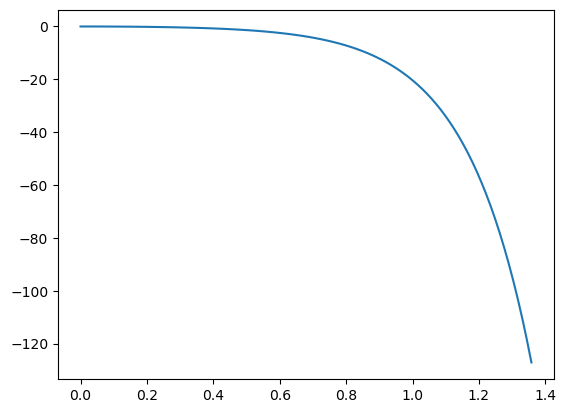

TransferFunction(array([-5., -5.,  0.]), array([1, 0]))

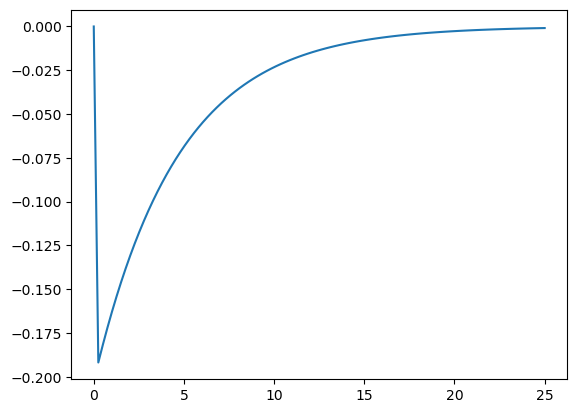

TransferFunction(array([-4.47368421, -4.47368421,  0.        ]), array([1, 0]))

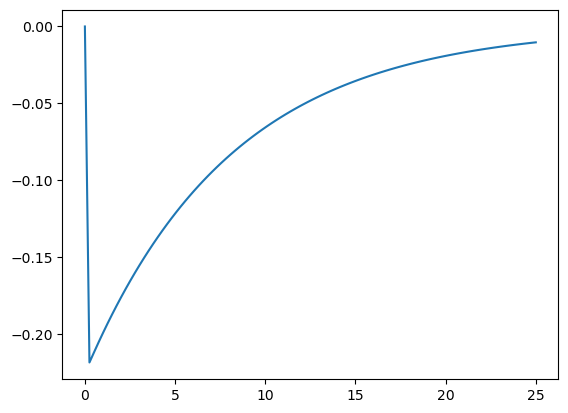

TransferFunction(array([-3.94736842, -3.94736842,  0.        ]), array([1, 0]))

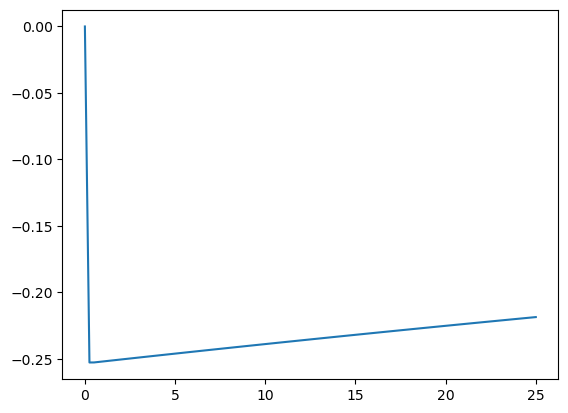

TransferFunction(array([-3.42105263, -3.42105263,  0.        ]), array([1, 0]))

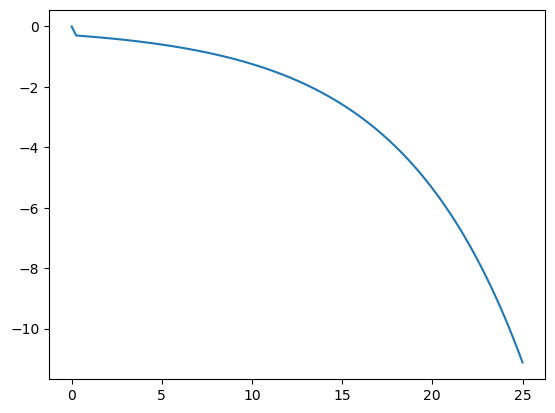

TransferFunction(array([-2.89473684, -2.89473684,  0.        ]), array([1, 0]))

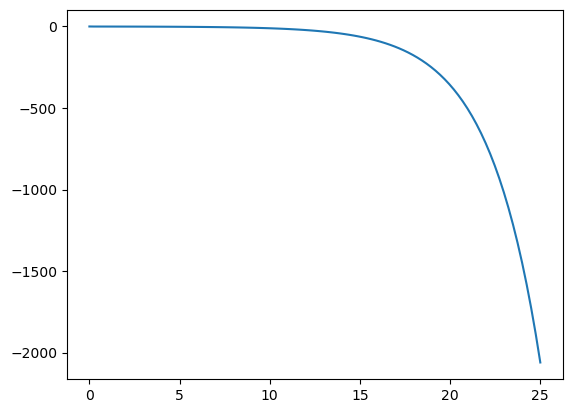

TransferFunction(array([-2.36842105, -2.36842105,  0.        ]), array([1, 0]))

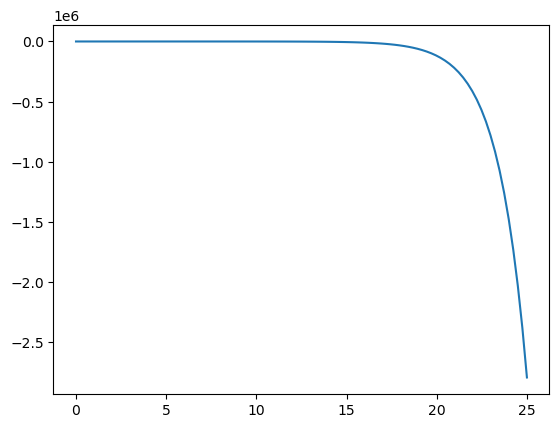

TransferFunction(array([-1.84210526, -1.84210526,  0.        ]), array([1, 0]))

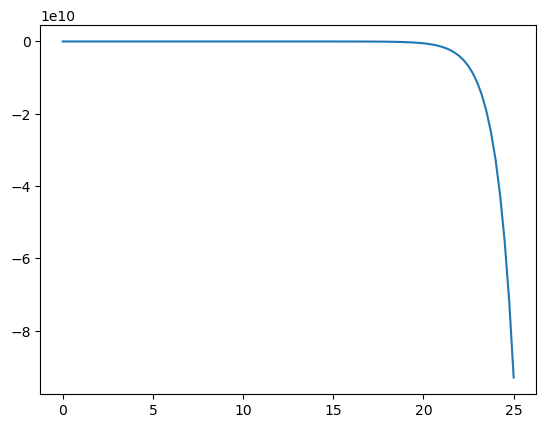

TransferFunction(array([-1.31578947, -1.31578947,  0.        ]), array([1, 0]))

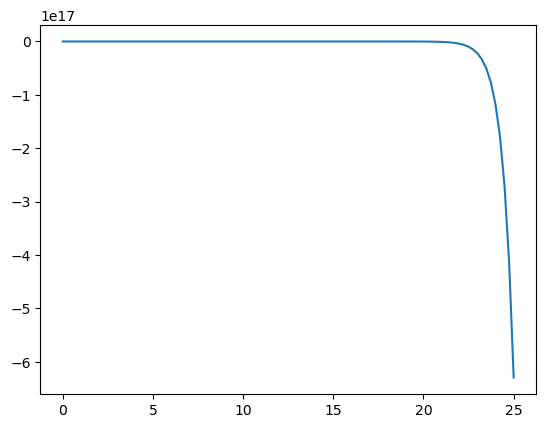

TransferFunction(array([-0.78947368, -0.78947368,  0.        ]), array([1, 0]))

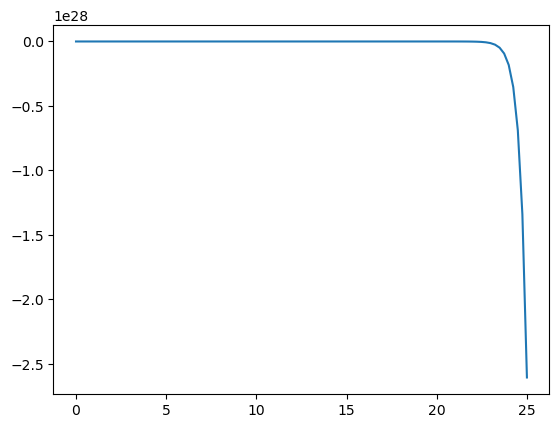

TransferFunction(array([-0.26315789, -0.26315789,  0.        ]), array([1, 0]))

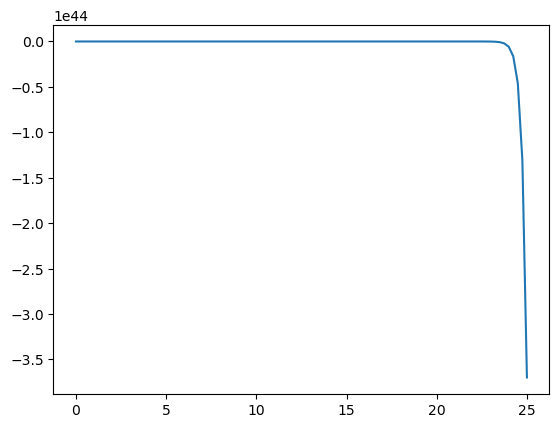

TransferFunction(array([0.26315789, 0.26315789, 0.        ]), array([1, 0]))

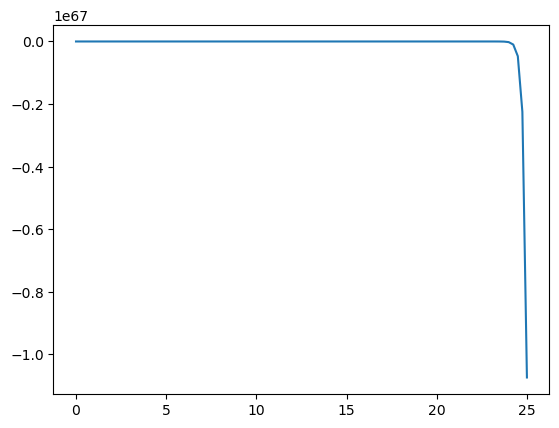

TransferFunction(array([0.78947368, 0.78947368, 0.        ]), array([1, 0]))

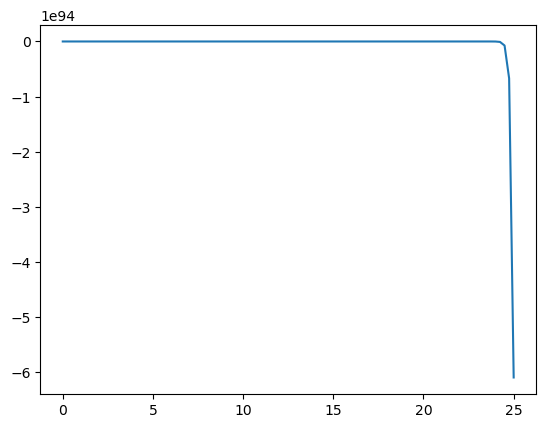

TransferFunction(array([1.31578947, 1.31578947, 0.        ]), array([1, 0]))

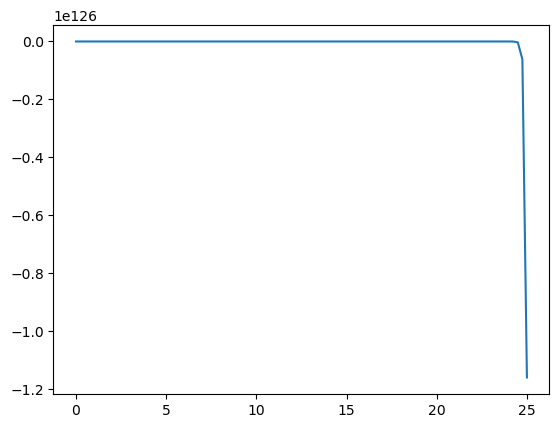

TransferFunction(array([1.84210526, 1.84210526, 0.        ]), array([1, 0]))

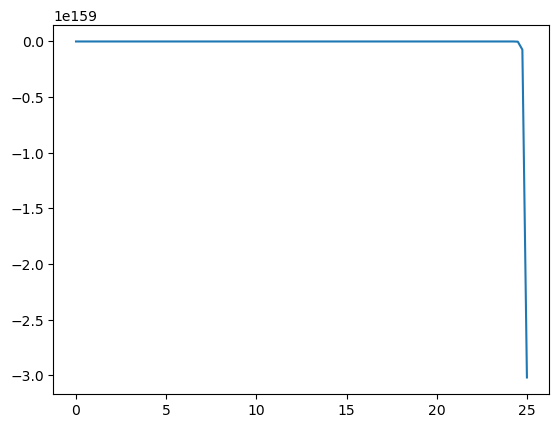

TransferFunction(array([2.36842105, 2.36842105, 0.        ]), array([1, 0]))

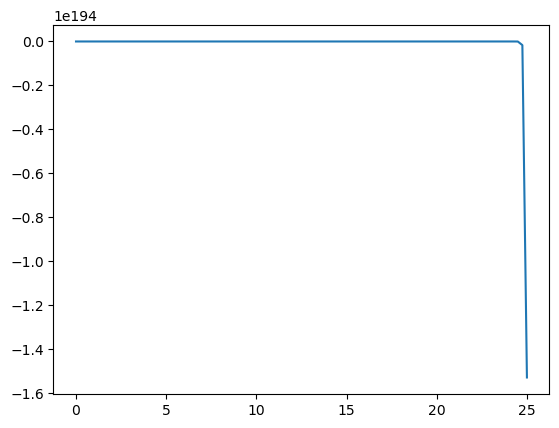

TransferFunction(array([2.89473684, 2.89473684, 0.        ]), array([1, 0]))

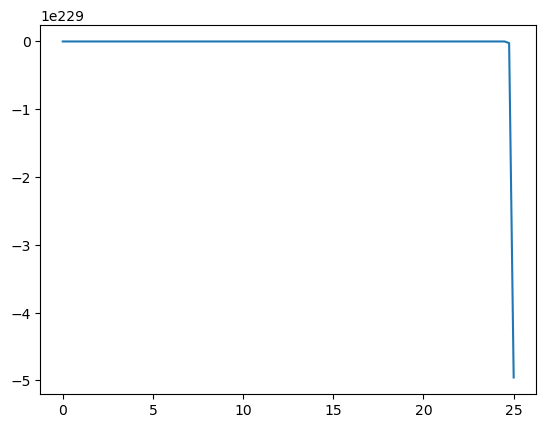

TransferFunction(array([3.42105263, 3.42105263, 0.        ]), array([1, 0]))

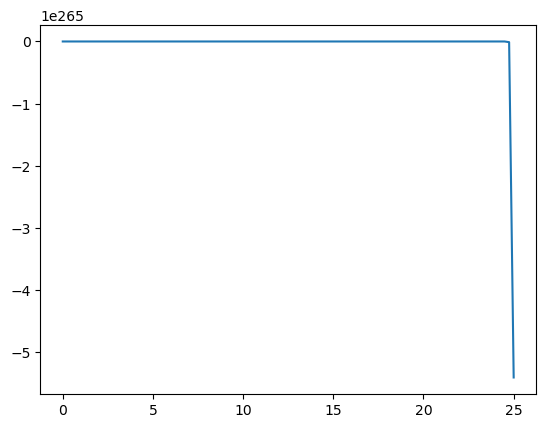

TransferFunction(array([3.94736842, 3.94736842, 0.        ]), array([1, 0]))

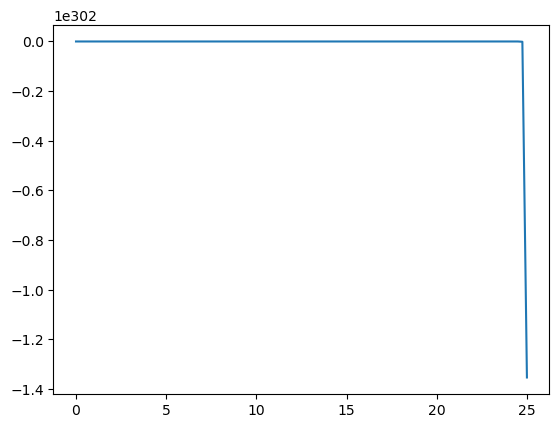

c:\Users\mesfink\anaconda3\envs\lstmPractice\lib\site-packages\control\timeresp.py:1025: RuntimeWarning: overflow encountered in matmul
  xout[:, i] = expAdt @ xout[:, i-1]
c:\Users\mesfink\anaconda3\envs\lstmPractice\lib\site-packages\control\timeresp.py:1025: RuntimeWarning: invalid value encountered in matmul
  xout[:, i] = expAdt @ xout[:, i-1]
c:\Users\mesfink\anaconda3\envs\lstmPractice\lib\site-packages\control\timeresp.py:1026: RuntimeWarning: invalid value encountered in matmul
  yout = C @ xout


TransferFunction(array([4.47368421, 4.47368421, 0.        ]), array([1, 0]))

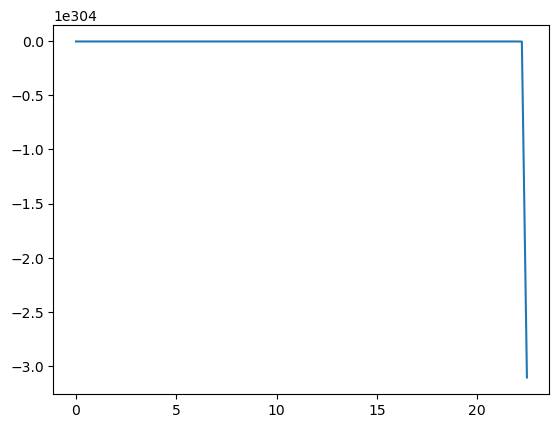

TransferFunction(array([5., 5., 0.]), array([1, 0]))

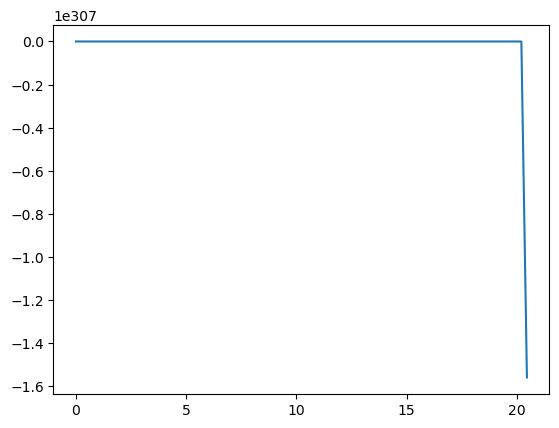

In [9]:
G = ctrl.TransferFunction(num_coeffs_float, den_coeffs_float)
t_imp = np.linspace(0, 10, 1000)
t_imp, x_imp = ctrl.step_response(G)

plt.plot(t_imp, x_imp)
plt.show()
Kp = np.linspace(-5, 5, 20)
Kd = np.linspace(-5, 5, 20)
Ki = 0

zipped_Ks = list(zip(Kp, Kd))
for i in range(len(zipped_Ks)):
  Gc = ctrl.TransferFunction([zipped_Ks[i][1], zipped_Ks[i][0], Ki], [1, 0])
  G_load = ctrl.feedback(G, Gc)
  t_imp, x_imp = ctrl.impulse_response(G_load)
  display(Gc)
  plt.plot(t_imp, x_imp)
  plt.show()